In [52]:
import os
import csv
import pandas as pd

In [53]:
### 資料匯入 ###

# 列出所有資料夾
folders = [d for d in os.listdir() if os.path.isdir(os.path.join(d)) and d[0] == '1']
print('資料夾:\n',folders)

# 101 年資料不完善
folders = [d for d in folders if d not in ['101S1', '101S2', '101S3','101S4']]
print('新資料夾:\n',folders)

資料夾:
 ['101S1', '101S2', '101S3', '101S4', '102S1', '102S2', '102S3', '102S4', '103S1', '103S2', '103S3', '103S4', '104S1', '104S2', '104S3', '104S4', '105S1', '105S2', '105S3', '105S4', '106S1', '106S2', '106S3', '106S4', '107S1', '107S2', '107S3', '107S4', '108S1', '108S2', '108S3', '108S4', '109S1', '109S2', '109S3', '109S4', '110S1', '110S2', '110S3', '110S4', '111S1', '111S2', '111S3', '111S4', '112S1', '112S2', '112S3']
新資料夾:
 ['102S1', '102S2', '102S3', '102S4', '103S1', '103S2', '103S3', '103S4', '104S1', '104S2', '104S3', '104S4', '105S1', '105S2', '105S3', '105S4', '106S1', '106S2', '106S3', '106S4', '107S1', '107S2', '107S3', '107S4', '108S1', '108S2', '108S3', '108S4', '109S1', '109S2', '109S3', '109S4', '110S1', '110S2', '110S3', '110S4', '111S1', '111S2', '111S3', '111S4', '112S1', '112S2', '112S3']


In [54]:
## 資料整理 ##

dfs_rental = []

for d in folders:

    df_rental_a = pd.read_csv(os.path.join(d,'A_lvr_land_C.csv'), index_col=False, quoting=csv.QUOTE_NONE)
    df_rental_a['季度'] = d[-1]
    df_rental_a['交易類型'] = "租屋"
    df_rental_a['縣市'] = '台北市'
    dfs_rental.append(df_rental_a.iloc[1:])
    
    df_rental_f = pd.read_csv(os.path.join(d,'F_lvr_land_C.csv'), index_col=False, quoting=csv.QUOTE_NONE)
    df_rental_f['季度'] = d[-1]
    df_rental_f['交易類型'] = "租屋"
    df_rental_f['縣市'] = '新北市'
    dfs_rental.append(df_rental_f.iloc[1:])

# 整併雙北租屋資訊
df_rental = pd.concat(dfs_rental, sort=True)

# 新增資訊
df_rental['年份'] = df_rental['租賃年月日'].astype(str).str[:3].astype(int)
df_rental['單價元坪'] = df_rental['單價元平方公尺'].astype(float)* 3.30579
df_rental['建物型態2'] = df_rental['建物型態'].str.split('(').str[0]
#df_rental.index = pd.to_datetime((df_rental['租賃年月日'].astype(str).str[:3].astype(int) + 1911).astype(str) 
#                                 + df_rental['租賃年月日'].str[3:] ,errors='coerce')

# 選擇欲租屋區域
center = {'三重區', '中和區', '中山區', '中正區', '信義區', '內湖區', '北投區', '南港區', '士林區', '大同區', '大安區', '文山區',
          '新店區', '新莊區', '松山區', '板橋區', '永和區', '萬華區', '蘆洲區'}

In [55]:
# 查看價格分布
cond = (  (df_rental['主要用途'] == '住家用')
        & (df_rental['年份'] == 112)
        & (df_rental['鄉鎮市區'].isin(center))
       )
df_rental[cond].groupby('鄉鎮市區')['單價元坪'].describe()

,count,mean,std,min,25%,50%,75%,max
鄉鎮市區,,,,,,,,
三重區,682.0,1021.435791,430.126373,353.71953,717.356430,904.133565,1209.919140,3368.60001
中和區,703.0,963.658946,460.980180,238.01688,677.686950,852.893820,1110.745440,4426.45281
中山區,863.0,1705.726351,514.428458,499.17429,1335.539160,1676.035530,2026.449270,3361.98843
中正區,230.0,1543.458978,559.637729,585.12483,1175.208345,1452.894705,1811.572920,4667.77548
信義區,363.0,1552.200454,775.489174,466.11639,1044.629640,1391.737590,1933.887150,10072.74213
內湖區,392.0,1097.201821,406.357807,396.69480,833.059080,998.348580,1271.076255,2912.40099
北投區,396.0,1034.879229,361.979352,310.74426,790.083810,970.249365,1213.224930,2753.72307
南港區,153.0,1080.042645,381.351980,419.83533,800.001180,1047.935430,1305.787050,2234.71404
士林區,524.0,1389.403349,576.165624,502.48008,976.860945,1276.034940,1642.977630,4353.72543


In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 設定 Matplotlib 使用中文字體
font_path = 'C:/Users/gary8/實價登錄之應用/NotoSansTC-Medium.ttf'
font_prop = FontProperties(fname = font_path, size=14)
plt.rcParams['font.family'] = font_prop.get_name()
sns.set_style("darkgrid",{"font.sans-serif":['Microsoft JhengHei']})

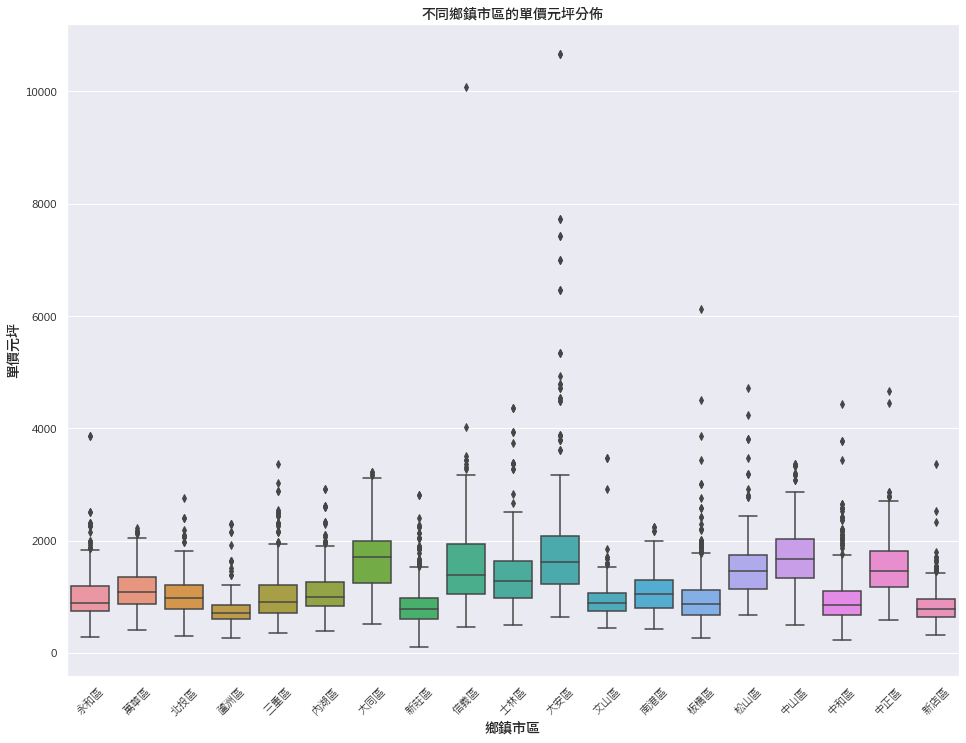

In [122]:
# 過濾資料
filtered_data = df_rental[cond]

# 畫盒鬚圖
plt.figure(figsize=(16, 12))
sns.boxplot(x='鄉鎮市區', y='單價元坪', data=filtered_data, order=center)
plt.xticks(rotation=45)  
plt.xlabel('鄉鎮市區', fontproperties = font_prop, fontsize = 14)
plt.ylabel('單價元坪', fontproperties = font_prop)
plt.title('不同鄉鎮市區的單價元坪分佈', fontproperties = font_prop)
plt.show()

In [123]:
## 不同地區每年租屋價格走勢圖 ##

price_rental = {}
for district in center:
    cond = (  (df_rental['主要用途'] == '住家用')
            & (df_rental['鄉鎮市區'] == district)
           )
    
    groups = df_rental[cond]['年份']
    
    price_rental[district] = df_rental[cond]['單價元坪'].astype(float).groupby(groups).median().loc[101:112]
    
price_history_rental = pd.DataFrame(price_rental)
price_history_rental 

,永和區,萬華區,北投區,蘆洲區,三重區,內湖區,大同區,新莊區,信義區,士林區,大安區,文山區,南港區,板橋區,松山區,中山區,中和區,中正區,新店區
年份,,,,,,,,,,,,,,,,,,,
101,588.430620,945.455940,1001.654370,495.868500,808.265655,998.348580,1487.605500,557.025615,1428.101280,1203.307560,1285.952310,697.521690,626.447205,740.496960,1461.159180,1319.010210,667.76958,1249.588620,690.91011
102,694.215900,823.141710,1117.357020,631.405890,763.637490,1004.960160,1712.399220,552.066930,1385.126010,1266.117570,1299.175470,735.538275,747.108540,978.513840,1256.200200,1438.018650,657.85221,1180.167030,628.10010
103,676.034055,1056.199905,1038.018060,502.480080,806.612760,950.414625,1642.977630,578.513250,1461.159180,1295.869680,1398.349170,730.579590,793.389600,1003.307265,1269.423360,1484.299710,687.60432,1223.142300,727.27380
104,723.968010,874.381455,998.348580,709.091955,778.513545,985.125420,1606.613940,606.612465,1444.630230,1299.175470,1403.307855,773.554860,823.141710,1021.489110,1358.679690,1474.382340,714.05064,1309.092840,657.85221
105,743.802750,1044.629640,1019.836215,538.843770,680.992740,988.431210,1609.919730,618.182730,1467.770760,1289.258100,1312.398630,763.637490,862.811190,904.133565,1375.208640,1497.522870,714.05064,1315.704420,700.82748
106,790.083810,1198.348875,973.555155,623.141415,730.579590,1024.794900,1586.779200,642.976155,1429.754175,1223.142300,1421.489700,758.678805,876.034350,1163.638080,1299.175470,1505.787345,753.72012,1348.762320,723.96801
107,780.166440,1029.753585,970.249365,628.100100,743.802750,1041.323850,1619.837100,652.893525,1494.217080,1315.704420,1456.200495,842.976450,866.116980,849.588030,1375.208640,1547.109720,753.72012,1352.068110,694.21590
108,816.530130,1054.547010,966.943575,717.356430,973.555155,991.737000,1619.837100,672.728265,1446.283125,1262.811780,1438.018650,879.340140,988.431210,879.340140,1406.613645,1550.415510,763.63749,1390.084695,763.63749
109,900.827775,1080.993330,981.819630,733.885380,955.373310,1011.571740,1466.117865,664.463790,1457.853390,1252.894410,1494.217080,872.728560,976.860945,909.092250,1350.415215,1560.332880,763.63749,1363.638375,763.63749


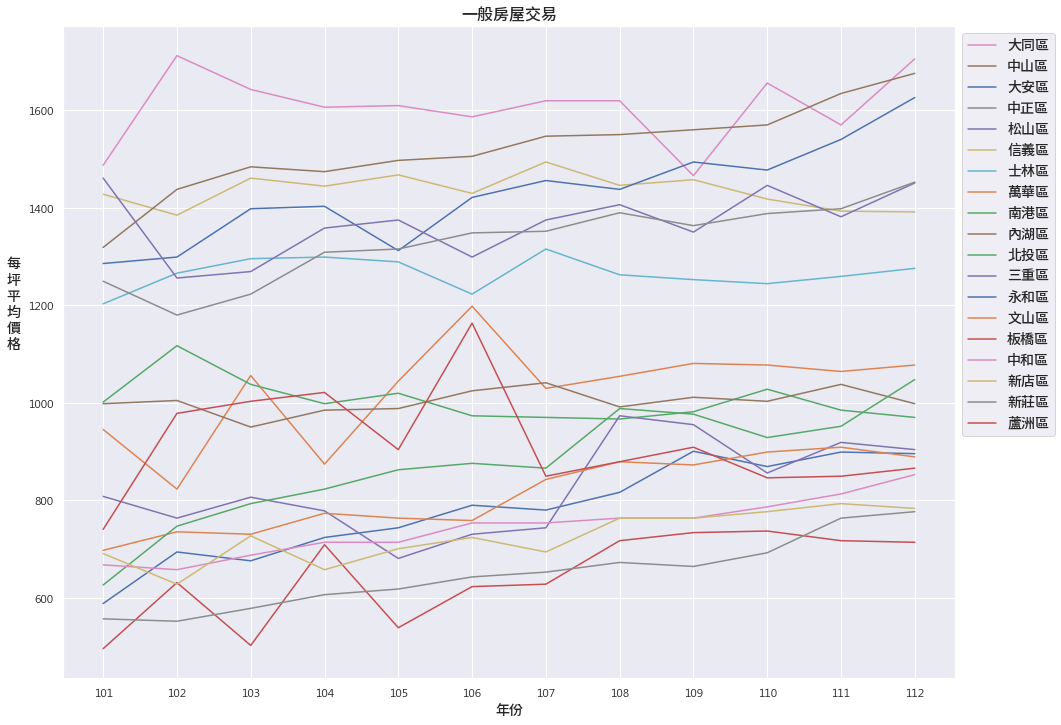

In [131]:
# 每個地區不同年份不動產租賃每坪平均價格圖表
fig, ax = plt.subplots(figsize = (16, 12))

# 繪製資料
price_history_rental.plot(ax = ax)
plt.xlabel('年份', fontproperties = font_prop, fontsize = 14)
plt.ylabel('每      \n坪      \n平      \n均      \n價      \n格      ', fontproperties = font_prop, fontsize = 14, rotation = 0)
plt.title('不動產租賃', fontproperties = font_prop, fontsize = 16)

# 取得當前的圖例物件
handles, labels = plt.gca().get_legend_handles_labels()

# 按照 sorted_columns 的順序重新排列 handles 和 labels
sorted_columns = price_history_rental.loc[112].sort_values(ascending=False).index
handles = [handles[labels.index(column)] for column in sorted_columns]
labels = sorted_columns

# 更新圖例
plt.legend(handles, labels,loc = 'upper left', bbox_to_anchor = (1, 1), fontsize = 5, prop = font_prop)
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(ticks = price_history_rental.index)

# 顯示圖表
plt.show()

In [134]:
## 不同建物每年租屋價格走勢圖 ##
building_type_prices = {}
for building_type in set(df_rental['建物型態2']):
    cond = (
        (df_rental['主要用途'] == '住家用')
        & (df_rental['單價元坪'] < df_rental["單價元坪"].quantile(0.8))
        & (df_rental['單價元坪'] > df_rental["單價元坪"].quantile(0.2))
        & (df_rental['建物型態2'] == building_type)
        )
    building_type_prices[building_type] = df_rental[cond]['單價元坪'].groupby(df_rental[cond]['年份']).median().loc[101:112]
    
price_history_rental_type = pd.DataFrame(building_type_prices)[['公寓', '住宅大樓', '套房', '華廈']]
price_history_rental_type 

,公寓,住宅大樓,套房,華廈
年份,,,,
101,862.811190,1153.720710,1150.414920,1014.877530
102,912.398040,1140.497550,1087.604910,1057.852800
103,945.455940,1160.332290,1242.977040,1100.828070
104,922.315410,1138.844655,1246.282830,1076.034645
105,895.869090,1117.357020,1269.423360,1071.075960
106,902.480670,1123.968600,1335.539160,1105.786755
107,899.174880,1105.786755,1254.547305,1107.439650
108,919.009620,1077.687540,1127.274390,1084.299120
109,895.869090,1067.770170,1196.695980,1085.952015


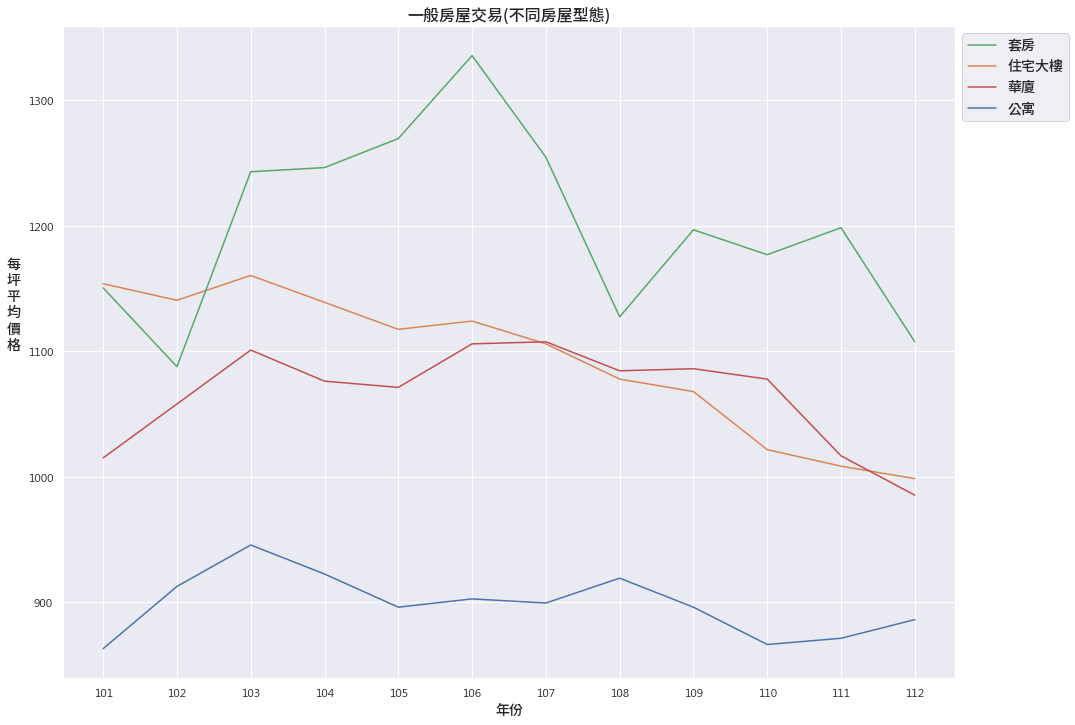

In [135]:
# 每個建物不同年份不動產租賃每坪平均價格圖表
fig, ax = plt.subplots(figsize = (16, 12))

# 繪製資料
price_history_rental_type.plot(ax = ax)
plt.xlabel('年份', fontproperties = font_prop, fontsize = 14)
plt.ylabel('每      \n坪      \n平      \n均      \n價      \n格      ', fontproperties = font_prop, fontsize = 14, rotation = 0)
plt.title('不動產租賃(不同房屋型態)', fontproperties = font_prop, fontsize = 16)

# 取得當前的圖例物件
handles, labels = plt.gca().get_legend_handles_labels()

# 按照 sorted_columns 的順序重新排列 handles 和 labels
sorted_columns = price_history_rental_type.loc[112].sort_values(ascending=False).index
handles = [handles[labels.index(column)] for column in sorted_columns]
labels = sorted_columns

# 更新圖例
plt.legend(handles, labels,loc = 'upper left', bbox_to_anchor = (1, 1), fontsize = 5, prop = font_prop)
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(ticks = price_history_rental_type.index)

plt.show()

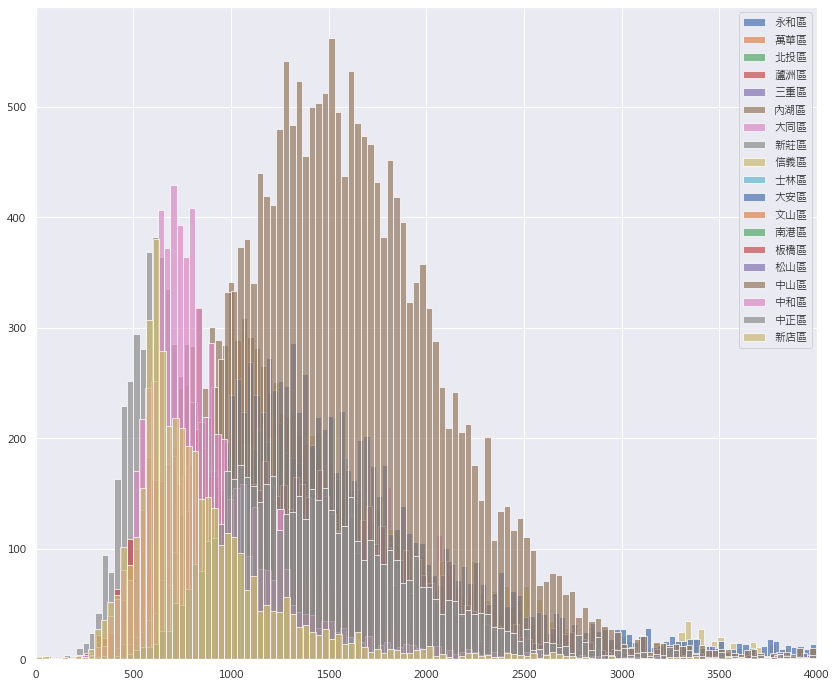

In [145]:
plt.figure(figsize=(14, 12))
for district in center:
    dfdistrict = df_rental[df_rental['鄉鎮市區'] == district]
    dfdistrict['單價元坪'][dfdistrict['單價元坪'] < 4000].hist(bins=120, alpha=0.7)

plt.xlim(0, 4000)
plt.legend(center)

In [150]:
# 查看價格分布
type={'住宅大樓','華廈','套房','公寓'}
cond = (  (df_rental['主要用途'] == '住家用')
        & (df_rental['年份'] == 112)
        & (df_rental['鄉鎮市區'].isin(center))
        & (df_rental['建物型態2'].isin(type))
       )
df_rental[cond].groupby('建物型態2')['單價元坪'].describe()

,count,mean,std,min,25%,50%,75%,max
建物型態2,,,,,,,,
住宅大樓,2387.0,1391.011895,574.402382,109.09107,932.232780,1305.78705,1800.002655,3514.05477
公寓,3296.0,942.485142,409.385256,238.01688,687.604320,856.19961,1067.770170,4723.97391
套房,876.0,1467.944352,484.825956,274.38057,1129.753732,1418.18391,1735.539750,3110.74839
華廈,1279.0,1183.744210,539.293035,261.15741,796.695390,1071.07596,1467.770760,5338.85085


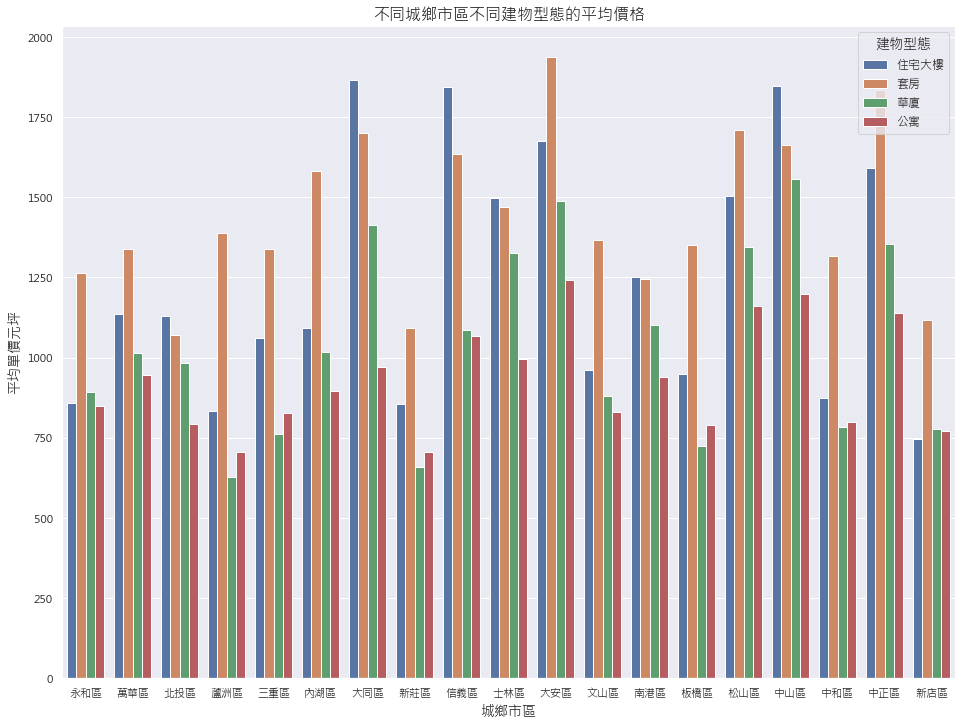

In [157]:
import numpy as np

# 設定圖的大小
plt.figure(figsize=(16, 12))

# 篩選符合條件的資料
filtered_data = df_rental[cond]

# 使用長條圖呈現價格分布
sns.barplot(x='鄉鎮市區', y='單價元坪', hue='建物型態2', data=filtered_data, estimator=np.median, ci=None, order=center)

# 設定圖的標題和標籤
plt.title('不同城鄉市區不同建物型態的平均價格', fontsize=16)
plt.xlabel('城鄉市區', fontsize=14)
plt.ylabel('平均單價元坪', fontsize=14)

# 顯示圖例
plt.legend(title='建物型態', title_fontsize='14', fontsize='12', loc='upper right')

# 顯示圖表
plt.show()


In [158]:
filtered_data = df_rental[cond]
filtered_data

,主要建材,主要用途,交易標的,交易類型,備註,單價元平方公尺,土地位置建物門牌,土地面積平方公尺,季度,建物型態,...,車位總額元,車位面積平方公尺,車位類別,都市土地使用分區,鄉鎮市區,非都市土地使用分區,非都市土地使用編定,年份,單價元坪,建物型態2
1,鋼骨鋼筋混凝土造,住家用,建物,租屋,租賃契約書經法院公證，附地下4層汽車位一個編號226、機車位二個。,245,臺北市文山區車前路１１之２號二十二樓,0.0,1,住宅大樓(11層含以上有電梯),...,0,0.0,其他,商,文山區,NaN,NaN,112,809.91855,住宅大樓
5,鋼筋混凝土造,住家用,建物,租屋,NaN,424,臺北市中山區雙城街２５巷７號７樓,0.0,1,住宅大樓(11層含以上有電梯),...,0,0.0,NaN,商,中山區,NaN,NaN,112,1401.65496,住宅大樓
10,鋼筋混凝土造,住家用,建物,租屋,NaN,365,臺北市大同區赤峰街７１巷５號六樓,0.0,1,套房(1房1廳1衛),...,0,0.0,NaN,住,大同區,NaN,NaN,112,1206.61335,套房
13,鋼筋混凝土造,住家用,建物,租屋,社會住宅包租代管增辦第三期計畫，原待租租金30700，打八折後租金為24500，管理費137...,538,臺北市松山區八德路四段７５５號六樓之１,0.0,1,華廈(10層含以下有電梯),...,0,0.0,NaN,商,松山區,NaN,NaN,112,1778.51502,華廈
15,鋼筋混凝土造,住家用,建物,租屋,NaN,515,臺北市松山區民生東路四段６５號１樓,0.0,1,公寓(5樓含以下無電梯),...,0,0.0,NaN,商,松山區,NaN,NaN,112,1702.48185,公寓
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,鋼筋混凝土造,住家用,建物,租屋,此物件加入新北市社會住宅包租代管計畫，評定市價租金為16750元，包租包管方案打八折為134...,431,新北市永和區福和路３２５號十樓之１,0.0,3,套房(1房1廳1衛),...,0,0.0,NaN,商,永和區,NaN,NaN,112,1424.79549,套房
3703,鋼筋混凝土造,住家用,建物,租屋,NaN,362,新北市永和區保平路１７７巷６弄９號,0.0,3,公寓(5樓含以下無電梯),...,0,0.0,NaN,住,永和區,NaN,NaN,112,1196.69598,公寓
3704,鋼筋混凝土造,住家用,建物,租屋,NaN,250,新北市新店區錦秀路４９巷４號１樓,0.0,3,公寓(5樓含以下無電梯),...,0,0.0,NaN,其他,新店區,NaN,NaN,112,826.44750,公寓
3705,鋼筋混凝土造,住家用,建物,租屋,此為社會住宅包租代管,189,新北市新店區松林路５１-１號六樓,0.0,3,華廈(10層含以下有電梯),...,0,0.0,NaN,住,新店區,NaN,NaN,112,624.79431,華廈


In [171]:
df_rental['總額元'] = df_rental['總額元'].astype(float)
df_rental[cond].groupby('建物型態2')['總額元'].describe()

,count,mean,std,min,25%,50%,75%,max
建物型態2,,,,,,,,
住宅大樓,2387.0,49534.494344,43588.117164,5500.0,24900.0,36500.0,60000.0,600000.0
公寓,3296.0,22369.609223,10219.420494,5500.0,16000.0,20500.0,25000.0,138000.0
套房,876.0,16358.130137,10551.271670,5000.0,10000.0,13900.0,18725.0,100000.0
華廈,1279.0,40364.329163,29424.732643,9000.0,22000.0,30000.0,50000.0,267380.0


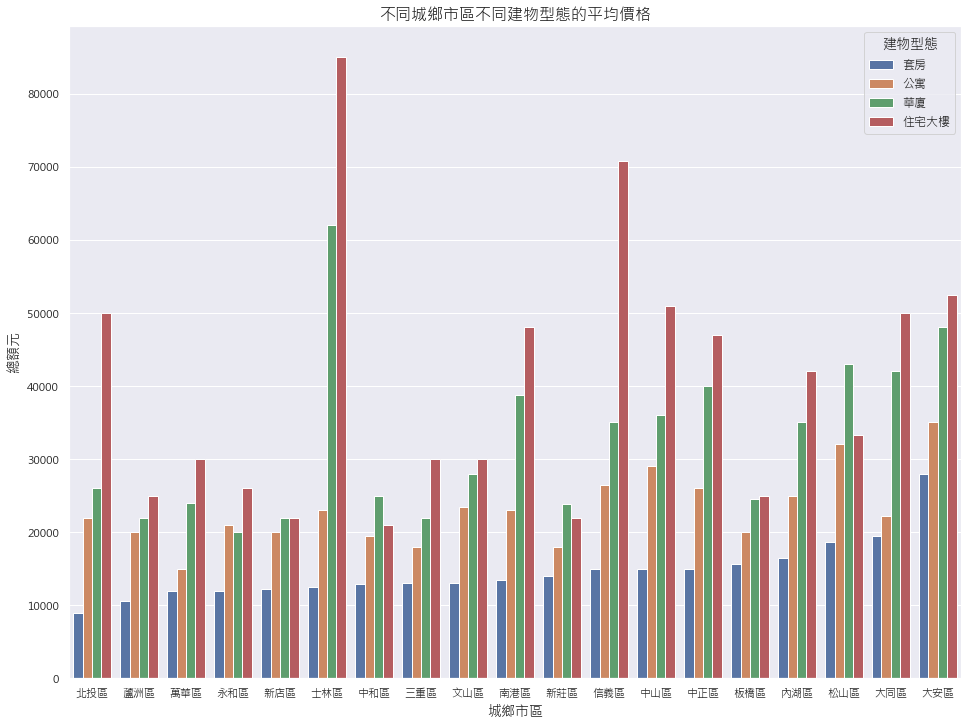

In [179]:
# 設定圖的大小
plt.figure(figsize=(16, 12))

# 篩選符合條件的資料
filtered_data = df_rental[cond]
median_prices = filtered_data.groupby(['鄉鎮市區', '建物型態2'])['總額元'].median().reset_index()
sorted_median_prices = median_prices.sort_values(by='總額元', ascending=True)

# 使用長條圖呈現價格分布
sns.barplot(x='鄉鎮市區', y='總額元', hue='建物型態2', data=sorted_median_prices, order=sorted_median_prices['鄉鎮市區'].unique())

# 設定圖的標題和標籤
plt.title('不同城鄉市區不同建物型態的平均價格', fontsize=16)
plt.xlabel('城鄉市區', fontsize=14)
plt.ylabel('總額元', fontsize=14)

# 顯示圖例
plt.legend(title='建物型態', title_fontsize='14', fontsize='12', loc='upper right')

# 顯示圖表
plt.show()

In [182]:
df_rental.columns

Index(['主要建材', '主要用途', '交易標的', '交易類型', '備註', '單價元平方公尺', '土地位置建物門牌', '土地面積平方公尺',
       '季度', '建物型態', '建物現況格局-廳', '建物現況格局-房', '建物現況格局-衛', '建物現況格局-隔間',
       '建物總面積平方公尺', '建築完成年月', '有無管理組織', '有無附傢俱', '租賃層次', '租賃年月日', '租賃筆棟數',
       '編號', '縣市', '總樓層數', '總額元', '車位總額元', '車位面積平方公尺', '車位類別', '都市土地使用分區',
       '鄉鎮市區', '非都市土地使用分區', '非都市土地使用編定', '年份', '單價元坪', '建物型態2'],
      dtype='object')

In [190]:

df_rental[(df_rental['建物型態2'] == '套房')]['有無附傢俱'].value_counts()

有    10877
無      480
Name: 有無附傢俱, dtype: int64